In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #导入网格搜索

In [2]:
data = pd.read_csv(r"C:\数模经历\data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.drop(["Name", "Ticket", "Cabin"], inplace=True, axis=1) #这些列由于缺失太多且对结果没有用，可以删除

In [6]:
data.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

In [7]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
data.dropna()

PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.699118      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[889 rows x 9 columns]

In [10]:
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x)) #将Embarked列改成以索引的数字
data.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

   Embarked  
0         0  
1         1  
2         0  
3         0  
4         0

In [11]:
data["Sex"] = (data["Sex"] == "male").astype("int") #将sex列改成数字
data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         0
1            2         1       1    0  38.0      1      0  71.2833         1
2            3         1       3    0  26.0      0      0   7.9250         0
3            4         1       1    0  35.0      1      0  53.1000         0
4            5         0       3    1  35.0      0      0   8.0500         0

In [12]:
X = data.iloc[:, data.columns != "Survived"] #提取出x轴

In [13]:
Y = data.iloc[:, data.columns == "Survived"] #提取出y轴

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0]) #重置索引，防止后面操作导致索引混乱
Xtrain

PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0            574       3    0  29.699118      0      0   7.7500         2
1            602       3    1  29.699118      0      0   7.8958         0
2            197       3    1  29.699118      0      0   7.7500         2
3            677       3    1  24.500000      0      0   8.0500         0
4             81       3    1  22.000000      0      0   9.0000         0
..           ...     ...  ...        ...    ...    ...      ...       ...
618          657       3    1  29.699118      0      0   7.8958         0
619          785       3    1  25.000000      0      0   7.0500         0
620          161       3    1  44.000000      0      1  16.1000         0
621          167       1    0  29.699118      0      1  55.0000         0
622          541       1    0  36.000000      0      2  71.0000         0

[623 rows x 8 columns]

In [15]:
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score #查看模型得分

0.7686567164179104

In [16]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=10)
score = cross_val_score(clf,X,Y,cv=10).mean()
score #使用交叉验证查看模型平均得分

0.7486267166042447

0.8170536828963796


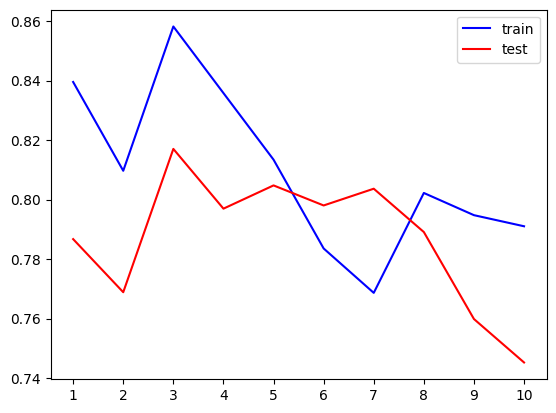

In [17]:
#查看训练前与训练后的得分情况，从而判断是训练集还是测试集过拟合
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=10
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    Score = cross_val_score(clf, X, Y, cv=10).mean()
    tr.append(score)
    te.append(Score)
print(max(te))
plt.plot(range(1,11), tr, c="blue", label="train")
plt.plot(range(1,11), te, c="red", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [18]:
import numpy as np
paramters = {
    "min_samples_leaf":[*(range(1,21))]
    ,"min_impurity_decrease":[*(np.linspace(0.0, 0.5, 25))]
    
}
clf = DecisionTreeClassifier(random_state=10
                            ,max_depth=3
                            ,criterion="entropy"
                            )
grid = GridSearchCV(clf, paramters,cv=10) #使用网格搜索判断最优参数
grid = grid.fit(Xtrain, Ytrain)

In [19]:
grid.best_params_ #可以查看最优参数的参数值

{'min_impurity_decrease': 0.0, 'min_samples_leaf': 1}

In [20]:
grid.best_score_

0.7895545314900152

**使用网格搜索后的得分，发现得分变少了，这也是网格搜索的缺点之一，因为不会删除参数，而是强行去寻找参数之间配合的最佳得分，反而可能会降低得分。所以使用网格搜索，往往是先自己分析了之后再进行专门探寻个别参数之间的最优值或者参数之间的搭配。**

In [38]:
#自我分析
clf = DecisionTreeClassifier(
                            random_state=10
                            ,max_depth=3
                            ,criterion="entropy"
                            # ,min_samples_leaf=1
                            # ,min_impurity_decrease=0.0
                            )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8582089552238806